# **NOTE** : Siapin 3 - 4 gambar dari gugel (linknya aja)

## Pengenalan Image Processing dengan Python
---
### 1. Import module yang diperlukan

> Bagian ini memuat beberapa module wajib yang digunakan dalam notebook ini: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) adalah library untuk manipulasi array, digunakan untuk aljabar linier, transformasi Fourier, dan kemampuan bilangan acak.
*   [Pandas](https://pandas.pydata.org/) adalah library untuk manipulasi data dan analisis data.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html)  adalah library untuk tugas-tugas computer vision.
*   [Skimage](https://scikit-image.org/) adalah library yang mendukung aplikasi pengolah gambar pada python.
*   [Matplotlib](https://matplotlib.org/) adalah library yang menghasilkan gambar dan menyediakan toolkit antarmuka pengguna grafis.


In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow

### 2. Baca Gambar dari Url
> Pada langkah ini kita akan membaca gambar dari url, dan menampilkannya menggunakan openCV, perhatikan perbedaannya saat membaca gambar dalam format RGB dan BGR. Saluran warna input default dalam format BGR untuk openCV.

In [ ]:
import requests

def fetch_img(url):
    img_data = requests.get(url).content
    img_name = url.split('/')[-1]
    with open(img_name, 'wb') as handler:
        handler.write(img_data)
    return img_name

link di bawah ganti sama gambar lain dari google. 

**pilih gambar > klik kanan > copy image address**

<font size=2>tulisan ini jangan ke ss toil</font>

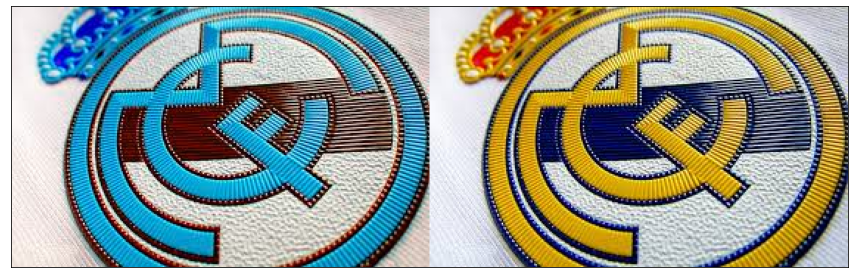

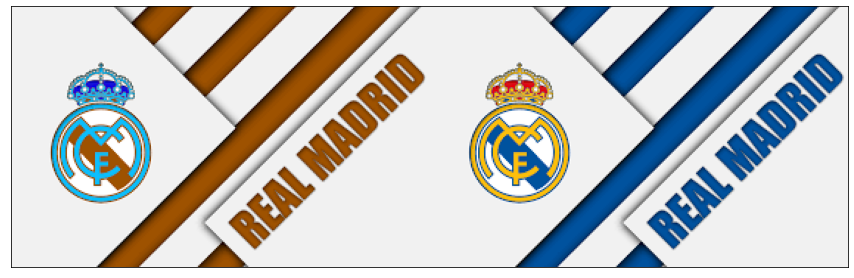

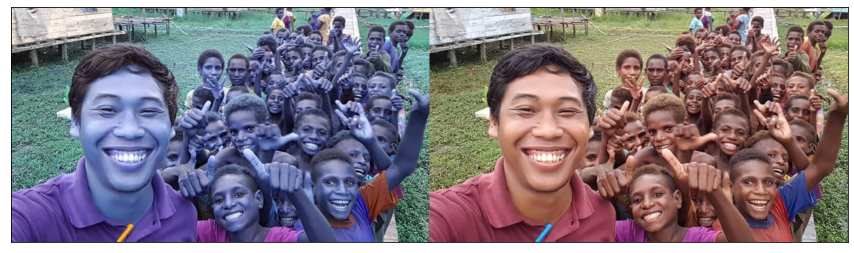

In [ ]:
# Buat daftar untuk menyimpan url gambar
urls = ["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTIr-NmMxrXqL3CWwRzhxdaw3u2qdT3f-VwwA&usqp=CAU",
        "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuQCjxZfwU0xUgDS50342KBNsq03eJZ-fZQQ&usqp=CAU",
        "",
        ]

# Fungsi untuk Baca dan tampilkan gambar
def cv_imshow(img, cmap=None):
    plt.figure(figsize = (15,15))
    plt.imshow(img, cmap=cmap)
    plt.xticks([]), plt.yticks([])
    plt.show()

# loop terhadap URL gambar, Anda dapat menyimpan beberapa url gambar dalam daftar

for url in urls:
    img_name = fetch_img(url)
    image = cv.imread(img_name)
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    final_frame = cv.hconcat((image, image_2))
    cv_imshow(final_frame)

---
### Tugas 1: Baca gambar dari URL dan tampilkan
> Cari gambar dari google, lalu gunakan url address dari gambar tersebut untuk melakukan operasi di bawah ini dengan menghapus tanda komentarnya.

In [ ]:
## TODO: LOAD IMAGE FROM URL
url = "https://wallpaperaccess.com/full/780066.jpg"
img_name = fetch_img(url)
myImg = cv.imread(img_name)  
cv_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))


---
### 3. Kontur Gambar dan Histogram



In [ ]:
# Gunakan image dari indeks pertama dalam variabel urls
img_name = fetch_img(urls[1])
image = cv.imread(img_name)

### Menghasilkan Histogram citra berwarna dan citra grayscale
Terkadang Anda ingin meningkatkan kontras pada gambar atau memperluas kontras di wilayah tertentu sambil mengorbankan detail dalam warna yang tidak terlalu bervariasi, atau tidak penting. Alat yang baik untuk menemukan wilayah yang menarik adalah histogram. Untuk membuat histogram dari data gambar kita, kita menggunakan fungsi matplot.pylab hist ().

Menampilkan histogram dari semua piksel pada gambar berwarna :

In [ ]:
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

Menampilkan histogram saluran R, G, B Kita dapat mengamati bahwa saluran hijau memiliki banyak piksel di 255, yang mewakili tambalan putih pada gambar.

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv_imshow(gray_image, cmap='gray')

In [ ]:
# Plot histogram gambar abu-abu. 
# Kita bisa mengamati bahwa frekuensi histori citra mengalami penurunan ~ 1/3 dari histogram citra berwarna
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

---
### Tugas 2: Tampilkan gambar anda dalam grayscale dan buat histogramnya

In [ ]:
myGrayImg = cv.cvtColor(myImg, cv.COLOR_BGR2GRAY)
cv_imshow(myGrayImg, cmap='gray')

In [ ]:
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

---

### Temukan kontur gambar dari gambar grayscale
Metode 1: Gunakan matplotlib. contour

In [ ]:
plt.contour(gray_image, origin = "image")

Metode 2: Gunakan library openCV

In [ ]:
# Setel ambang batas untuk deteksi kontur
ret, thresh = cv.threshold(gray_image,100,200,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

---
### Tugas 3: Temukan kontur gambar Anda sendiri


In [ ]:
# code anda di sini
ret, thresh = cv.threshold(myGrayImg,100,200,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(myImg, contours, -1, (0, 255, 0), 3)
plt.imshow(myImg)

---
### 4. Transformasi Grayscale dan Persamaan Histogram

### Grayscale Transformation

Bagian ini memberikan beberapa contoh melakukan transformasi matematis dari gambar grayscale

In [ ]:
# Ini adalah operasi kebalikan dari gambar grayscale, 
# Anda bisa melihat bahwa piksel cerah menjadi gelap, dan piksel gelap menjadi cerah
im2 = 255 - gray_image
cv_imshow(im2, cmap='gray')

In [ ]:
# Transformasi gambar lainnya, setelah menambahkan konstanta, 
# semua piksel menjadi lebih cerah dan efek gambar seperti perpeloncoan dihasilkan
im3 = (100.0/255)*gray_image + 100
cv_imshow(im3, cmap='gray')

In [ ]:
# Tingkat kecerahan gambar abu-abu berkurang setelah langkah ini
im4 = 255.0*(gray_image/255.0)**2
cv_imshow(im4, cmap='gray')

---
### Tugas 4: Cobalah beberapa operasi matematika pada gambar Anda

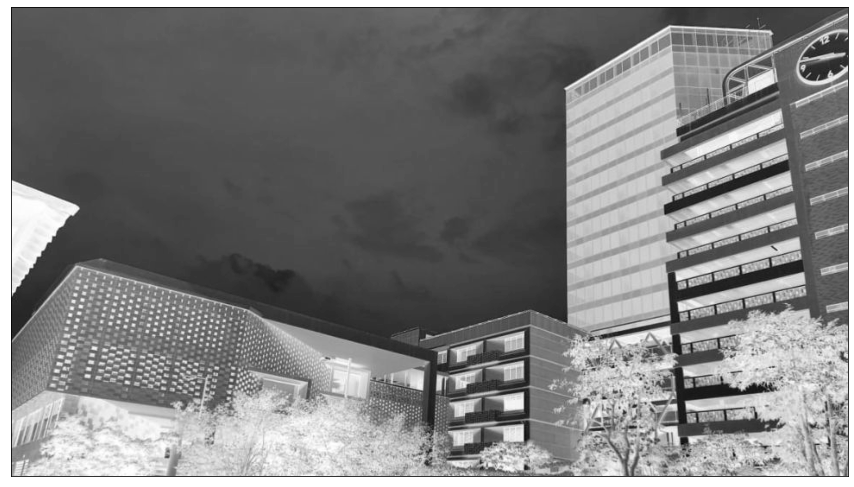

In [ ]:
## Terapkan kode Anda di sini
myGrayImgTrans = 255 - myGrayImg
cv_imshow(myGrayImgTrans, cmap='gray')

---
### Histogram Equalization
Bagian ini mendemonstrasikan pemerataan histogram pada gambar gelap. Transformasi ini meratakan histogram tingkat abu-abu sehingga semua intensitas menjadi seumum mungkin. Fungsi transformasi adalah fungsi distribusi kumulatif (cdf) dari nilai piksel pada citra (dinormalisasi untuk memetakan rentang nilai piksel ke rentang yang diinginkan). Contoh ini menggunakan gambar 4 (im4).

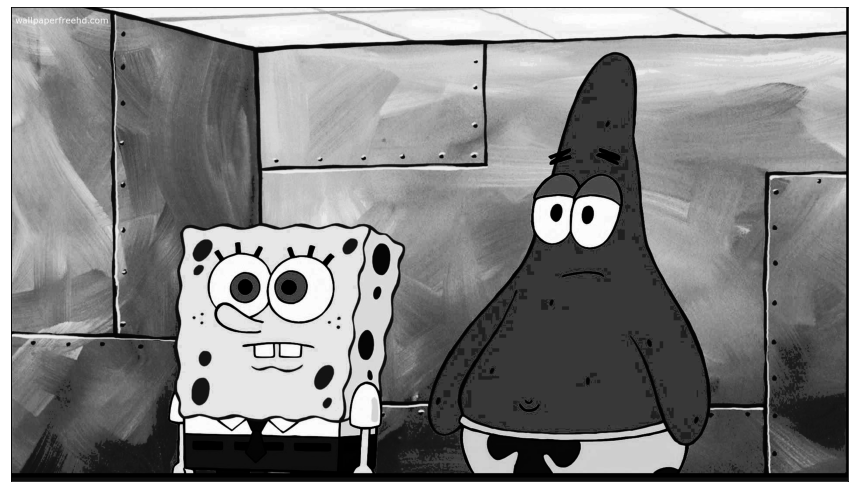

In [ ]:
# Fungsi dari histogram equalization
def histeq(im, nbr_bins = 256):
  """ Persamaan histogram dari citra grayscale.  """
  # dapatkan histogram gambar
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # fungsi distribusi kumulatif
  cdf = imhist.max()*cdf/cdf.max()  #normalisasi
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# terapkan fungsi pada gambar gelap Anda untuk meningkatkan kontras
# kita dapat mengamati bahwa kontras latar belakang hitam telah meningkat
im5 = histeq(im4)
cv_imshow(im5, cmap='gray')

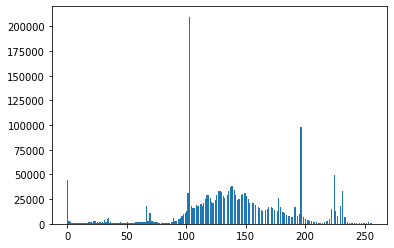

In [ ]:
# Ekstra: mencoba memvisualisasikan histogram citra setelah pemerataan histogram 
# Sebelum pemerataan histogram
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

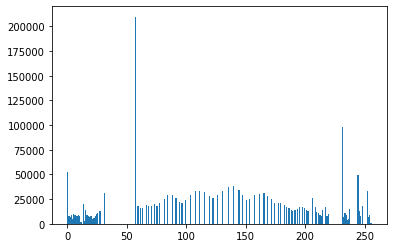

In [ ]:
# Setelah pemerataan histogram
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

---
### Tugas 5: Lakukan pemerataan histogram pada gambar grayscale Anda


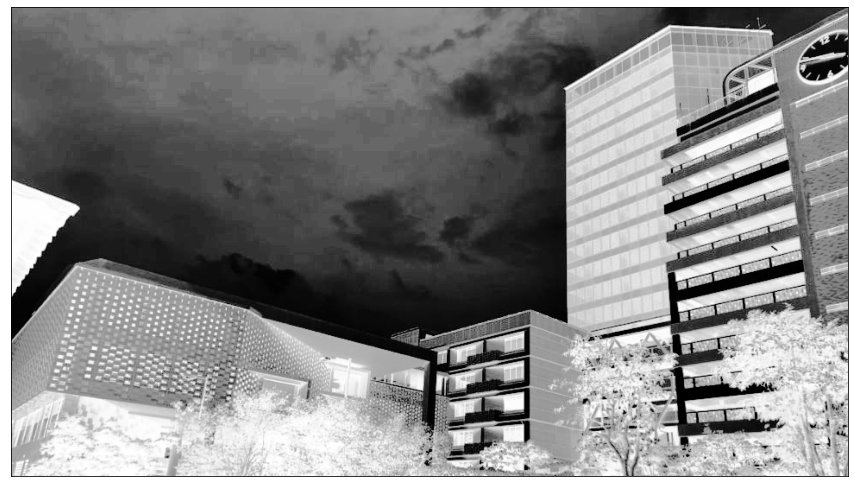

In [ ]:
## TODO: Masukkan Kode Anda di sini
##plt.imshow()
myGrayImgEq = histeq(myGrayImgTrans)
cv_imshow(myGrayImgEq, cmap='gray')

---
### 5. Transformasi Fourier dari Gambar Abu-abu
> Transformasi fourier digunakan untuk mencari domian frekuensi gambar. Anda dapat menganggap gambar sebagai sinyal yang diambil sampelnya dalam dua arah. Jadi mengambil transformasi fourier di kedua arah X dan Y memberi Anda representasi frekuensi gambar. Untuk sinyal sinusoidal, jika amplitudo berubah sangat cepat dalam waktu singkat, dapat dikatakan itu adalah sinyal frekuensi tinggi. Jika bervariasi perlahan, itu adalah sinyal frekuensi rendah. Tepi dan noise adalah konten frekuensi tinggi dalam gambar karena berubah secara drastis dalam gambar.

In [ ]:
# Buramkan gambar grayscale dengan filter Guassian dengan ukuran kernel 10
imBlur = cv.blur(gray_image,(5,5))
# Ubah gambar menjadi domain frekuensi
f = np.fft.fft2(imBlur)
# Bawa komponen frekuensi-nol ke tengah
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

---
### Tugas 6: Hasilkan transformasi fourier dari gambar grayscale Anda


In [ ]:
# todo: Terapkan kode Anda di sini

# Buramkan gambar grayscale dengan filter Guassian dengan ukuran kernel 10
myBlurImg = cv.blur(myGrayImg,(5,5))
# Ubah gambar menjadi domain frekuensi
f = np.fft.fft2(myBlurImg)
# Bawa komponen frekuensi-nol ke tengah
fshift = np.fft.fftshift(f)
my_magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(myBlurImg, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(my_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

---
### 6. Menemukan Tepi dengan Highpass Filtering di FFT
Bagian ini mendemonstrasikan melakukan high pass filter untuk menghilangkan komponen frekuensi rendah, sehingga menghasilkan gambar yang tajam yang berisi tepinya.

In [ ]:
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# hilangkan frekuensi rendah dengan ukuran persegi panjang 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(myBlurImg, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Gambar setelah HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Hasil dalam JET'), plt.xticks([]), plt.yticks([])
plt.show()